In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
plt.rc('font', family = 'Malgun Gothic')
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [3]:
share_df = pd.read_csv('./data/share_office_data.csv')
share_df = share_df.drop('Unnamed: 0', axis = 1)

In [4]:
share_df['trial_date'] = pd.to_datetime(share_df['trial_date'])
share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9624 entries, 0 to 9623
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   is_payment        9624 non-null   int64         
 1   user_uuid         9624 non-null   object        
 2   trial_date        9624 non-null   datetime64[ns]
 3   day               9624 non-null   int64         
 4   access_cnt        9624 non-null   float64       
 5   stay_time_second  9624 non-null   float64       
 6   site_id_1.0       9624 non-null   int64         
 7   site_id_2.0       9624 non-null   int64         
 8   site_id_3.0       9624 non-null   int64         
 9   site_id_4.0       9624 non-null   int64         
 10  site_id_5.0       9624 non-null   int64         
 11  site_id_6.0       9624 non-null   int64         
 12  site_id_17.0      9624 non-null   int64         
 13  site_id_47.0      9624 non-null   int64         
 14  site_id_49.0      9624 n

In [5]:
# 종속변수 분리하기
y = share_df['is_payment']

# 독립변수 
X = share_df.drop('is_payment', axis = 1)

print(y) 
X


0       0
1       0
2       1
3       0
4       0
       ..
9619    0
9620    0
9621    0
9622    0
9623    0
Name: is_payment, Length: 9624, dtype: int64


,user_uuid,trial_date,day,access_cnt,stay_time_second,site_id_1.0,site_id_2.0,site_id_3.0,site_id_4.0,site_id_5.0,site_id_6.0,site_id_17.0,site_id_47.0,site_id_49.0,weekend_0,weekend_1,weekend_2
0,2b251333-8676-4c11-a736-dcf2350f8821,2023-12-21,1,0.194594,-0.376654,0,0,0,0,0,0,0,0,1,0,1,0
1,e111619a-0975-451b-9a4a-bc8aea7b7b84,2023-12-21,2,-0.680425,-0.710456,0,1,0,0,0,0,0,0,0,0,1,0
2,4a184795-b056-4572-a874-644f68609ea3,2023-12-21,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0
3,2ba8ab19-2d40-4423-ad04-f0f9ca814871,2023-12-21,1,-0.789802,-0.957867,0,0,0,0,0,0,1,0,0,0,1,0
4,1d49ba36-6c23-405b-9514-aa7f4aeceff0,2023-12-21,1,-0.571047,-0.947592,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,d7599df4-1e5a-4f5e-97ce-c42047bfd87c,2023-11-17,2,2.382139,1.617335,0,0,0,0,0,1,0,0,0,0,0,1
9620,43263092-3b28-4817-9fa9-4205ad3097fe,2023-11-17,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0
9621,51a40f33-1027-4544-9b95-45bca7c104fb,2023-11-17,2,0.303971,2.304508,0,0,0,0,0,1,0,0,0,0,0,1
9622,3e649531-bf5b-4b99-84e5-ca3e0e647d0c,2023-11-18,1,-0.461670,-0.081283,0,0,1,0,0,0,0,0,0,0,0,1


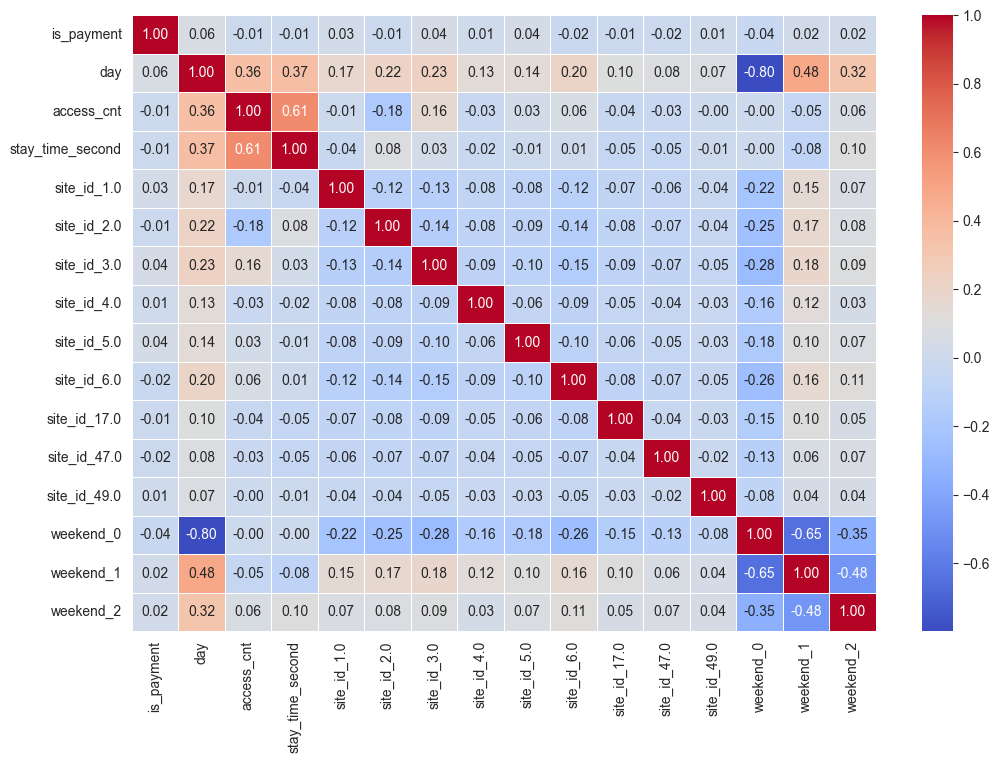

In [6]:
# 상관계수 찍기 위해 수치형 아닌 변수들 제외하기 
share_corr_df = share_df.drop(['user_uuid', 'trial_date'], axis = 1)

# 상관계수 계산 
correlation_matrix = share_corr_df.corr()

# 히트맵 시각화 
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', linewidth = 0.5 )
plt.show()

- 주말 여부가 이용 일수와 약~중의 상관계수를 가진다. 
- 이용 일수와 입퇴실 횟수, 체류 시간 상관계수 가지는데 당연하겠지.. 

In [7]:
# VIF 계산 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립변수 중 수치형 변수만 남기기 
x = X.drop(['user_uuid','trial_date'], axis = 1)

# VIF 계산하기 
vif_data = pd.DataFrame()
vif_data['Variable'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_data.sort_values(by = "VIF", ascending = False)

,Variable,VIF
5,site_id_3.0,inf
4,site_id_2.0,inf
3,site_id_1.0,inf
6,site_id_4.0,inf
9,site_id_17.0,inf
8,site_id_6.0,inf
7,site_id_5.0,inf
11,site_id_49.0,inf
13,weekend_1,inf
14,weekend_2,inf


> 상관계수는 거의 대부분 낮은데 VIF가 엄청나게 높다. 회귀 모델은 적합하지 않을 것 같다 

우선 XGBoost부터...해보쟈...

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 학습/테스트 데이터 분할 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6119480519480519
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1220
           1       0.39      0.11      0.17       705

    accuracy                           0.61      1925
   macro avg       0.51      0.51      0.46      1925
weighted avg       0.55      0.61      0.54      1925



- 재현율이 중요할까? 정밀도가 중요할까?
    - 재현율: 실제 T 중 맞게 예측한 T
    - 정밀도: 예측 T 중 실제 T 
- 

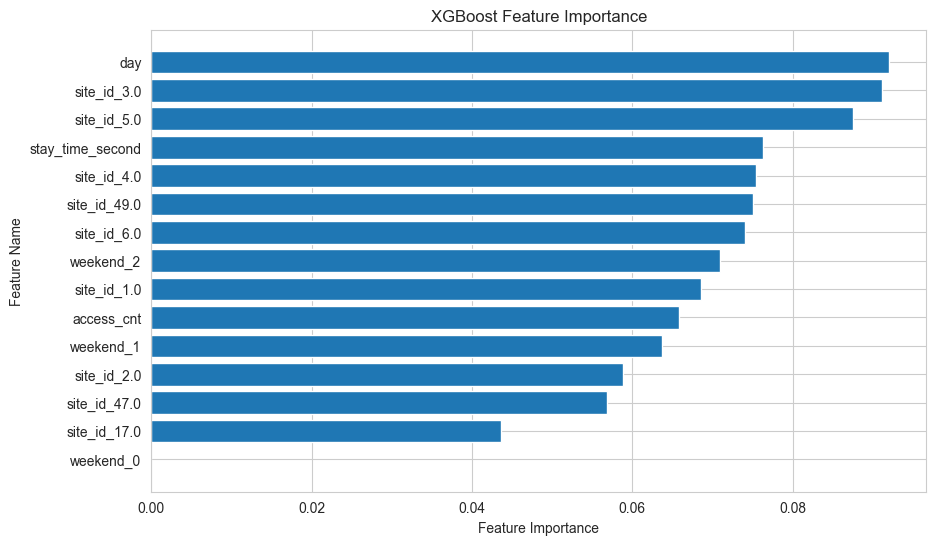

In [9]:
# Feature Importance 추출
feature_importances = model.feature_importances_
feature_names = x.columns

# 데이터프레임 생성 후 정렬
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
plt.show()

In [10]:
# SMOTE 적용하기 ###### 얘가 젤 낫다
from imblearn.over_sampling import SMOTE

# SMOTE 적용 (소수 클래스 오버샘플링)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# 학습/테스트 데이터 분할 (8:2 비율)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(x_resampled, y_resampled)

# 예측 및 평가
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6370866471326915
              precision    recall  f1-score   support

           0       0.61      0.77      0.68      1216
           1       0.68      0.50      0.57      1173

    accuracy                           0.64      2389
   macro avg       0.65      0.63      0.63      2389
weighted avg       0.65      0.64      0.63      2389



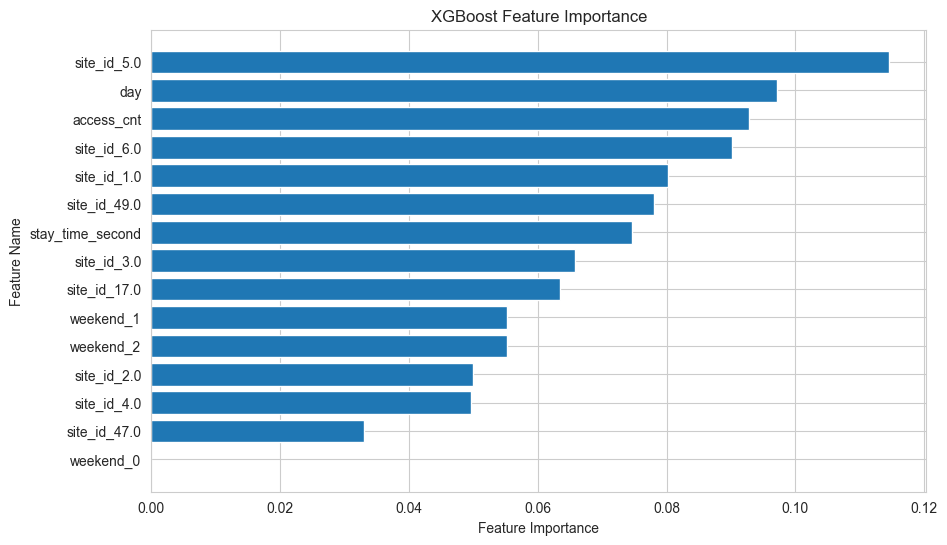

In [11]:
# Feature Importance 추출
feature_importances = model.feature_importances_
feature_names = x.columns

# 데이터프레임 생성 후 정렬
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
plt.show()

>> 그나마 젤 낫다! 

Accuracy: 0.6322077922077922
              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1220
           1       0.36      0.01      0.01       705

    accuracy                           0.63      1925
   macro avg       0.50      0.50      0.39      1925
weighted avg       0.53      0.63      0.49      1925



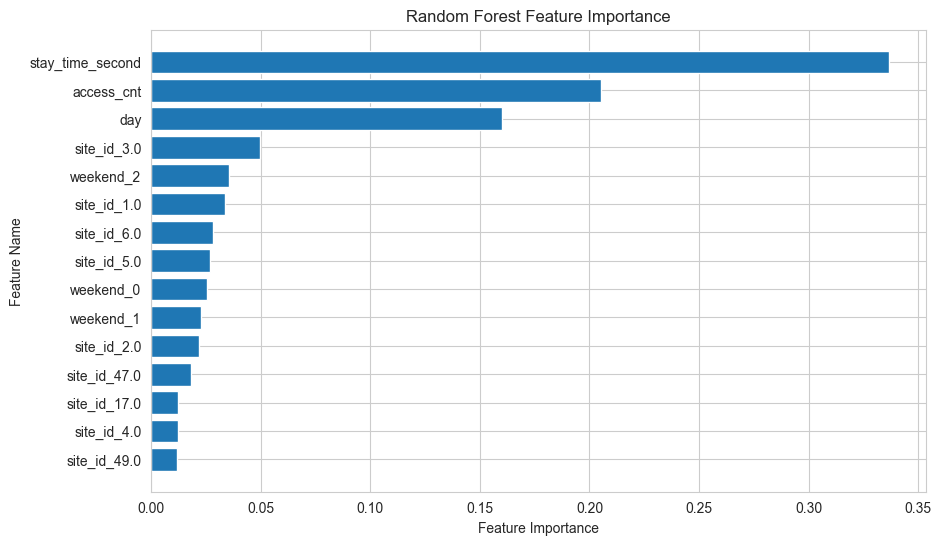

In [12]:
from sklearn.ensemble import RandomForestClassifier
# 학습/테스트 데이터 분할 (8:2 비율)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# RandomForest 모델 학습
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(x_train, y_train)

# 예측 및 평가
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance 추출
feature_importances = model.feature_importances_
feature_names = x.columns

# 데이터프레임 생성 후 정렬
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
plt.show()

In [13]:
# SMOTE 적용하기
from imblearn.over_sampling import SMOTE

# SMOTE 적용 (소수 클래스 오버샘플링)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# 학습/테스트 데이터 분할 (8:2 비율)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# RandomForest 모델 학습
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(x_resampled, y_resampled)

# 예측 및 평가
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5927166178317288
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      1216
           1       0.60      0.52      0.55      1173

    accuracy                           0.59      2389
   macro avg       0.59      0.59      0.59      2389
weighted avg       0.59      0.59      0.59      2389



------------ 

### 시간 변수 추가한 모델

In [14]:
visit_info = pd.read_csv('./data/trial_visit_info2.csv')
visit_info.head()

,Unnamed: 0,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid,stay_time2
0,0,3,2024-01-02,2025-02-27 00:40:41.437182,2441,2024-01-02 19:37:50.345305,2024-01-02 20:20:08.337566,418edd26-c1c1-49f6-b67f-3b29c3e868e9,0 days 00:40:41.437182
1,1,49,2024-01-01,2025-02-27 01:53:53.690012,6833,2024-01-01 14:01:18.626838,2024-01-01 15:58:02.826332,2d420a09-9889-412a-a06a-5c31c9989572,0 days 01:53:53.690012
2,2,3,2024-01-01,2025-02-27 04:47:05.102656,17225,2024-01-01 12:05:05.841506,2024-01-01 21:37:40.489976,418edd26-c1c1-49f6-b67f-3b29c3e868e9,0 days 04:47:05.102656
3,3,4,2024-01-01,2025-02-27 03:59:20.004848,14360,2024-01-01 14:30:55.279667,2024-01-01 18:33:02.104582,e9b1a5df-d70c-4ccf-af22-64fdae98d3a2,0 days 03:59:20.004848
4,4,4,2024-01-01,2025-02-27 00:55:41.445430,3341,2024-01-01 17:39:42.078159,2024-01-01 18:38:05.414576,e80f7f66-f24a-4637-95c9-20288fd811ee,0 days 00:55:41.445430


In [15]:
time_df = visit_info[['user_uuid','first_enter_time','last_leave_time']]

In [16]:
time_df

,user_uuid,first_enter_time,last_leave_time
0,418edd26-c1c1-49f6-b67f-3b29c3e868e9,2024-01-02 19:37:50.345305,2024-01-02 20:20:08.337566
1,2d420a09-9889-412a-a06a-5c31c9989572,2024-01-01 14:01:18.626838,2024-01-01 15:58:02.826332
2,418edd26-c1c1-49f6-b67f-3b29c3e868e9,2024-01-01 12:05:05.841506,2024-01-01 21:37:40.489976
3,e9b1a5df-d70c-4ccf-af22-64fdae98d3a2,2024-01-01 14:30:55.279667,2024-01-01 18:33:02.104582
4,e80f7f66-f24a-4637-95c9-20288fd811ee,2024-01-01 17:39:42.078159,2024-01-01 18:38:05.414576
...,...,...,...
11472,e0e372b4-7f33-498b-ba1a-895aaffe18ff,2021-05-05 05:07:50.850192,2021-05-05 09:29:52.321241
11473,ef91f58a-c205-4213-bca8-0adef36e7a24,2021-05-05 05:07:48.095251,2021-05-05 08:35:28.755801
11474,22aad31c-1958-4c83-bfde-099d70765447,2021-05-04 04:20:33.600933,2021-05-04 08:18:50.144279
11475,fce967b5-070c-46ed-a5fa-ef7d298cc7aa,2021-05-03 05:20:36.931652,2021-05-03 07:43:03.785931


In [17]:
# datetime 형변환 및 시간대 추출
time_df['first_enter_time'] = pd.to_datetime(time_df['first_enter_time'])
time_df['last_leave_time'] = pd.to_datetime(time_df['last_leave_time'])
time_df["enter_hour"] = time_df["first_enter_time"].dt.hour
time_df['leave_hour'] = time_df['last_leave_time'].dt.hour

In [18]:
time_df

,user_uuid,first_enter_time,last_leave_time,enter_hour,leave_hour
0,418edd26-c1c1-49f6-b67f-3b29c3e868e9,2024-01-02 19:37:50.345305,2024-01-02 20:20:08.337566,19,20
1,2d420a09-9889-412a-a06a-5c31c9989572,2024-01-01 14:01:18.626838,2024-01-01 15:58:02.826332,14,15
2,418edd26-c1c1-49f6-b67f-3b29c3e868e9,2024-01-01 12:05:05.841506,2024-01-01 21:37:40.489976,12,21
3,e9b1a5df-d70c-4ccf-af22-64fdae98d3a2,2024-01-01 14:30:55.279667,2024-01-01 18:33:02.104582,14,18
4,e80f7f66-f24a-4637-95c9-20288fd811ee,2024-01-01 17:39:42.078159,2024-01-01 18:38:05.414576,17,18
...,...,...,...,...,...
11472,e0e372b4-7f33-498b-ba1a-895aaffe18ff,2021-05-05 05:07:50.850192,2021-05-05 09:29:52.321241,5,9
11473,ef91f58a-c205-4213-bca8-0adef36e7a24,2021-05-05 05:07:48.095251,2021-05-05 08:35:28.755801,5,8
11474,22aad31c-1958-4c83-bfde-099d70765447,2021-05-04 04:20:33.600933,2021-05-04 08:18:50.144279,4,8
11475,fce967b5-070c-46ed-a5fa-ef7d298cc7aa,2021-05-03 05:20:36.931652,2021-05-03 07:43:03.785931,5,7


In [19]:
# 시간(hour) 열을 사인 & 코사인 변환
time_df['enter_hour_sin'] = np.sin(2 * np.pi * time_df['enter_hour'] / 24)
time_df['enter_hour_cos'] = np.cos(2 * np.pi * time_df['enter_hour'] / 24)
time_df['leave_hour_sin'] = np.sin(2 * np.pi * time_df['leave_hour'] / 24)
time_df['leave_hour_cos'] = np.cos(2 * np.pi * time_df['leave_hour'] / 24)

In [20]:
# 중복 제거 
time_df = time_df.drop_duplicates(subset = 'user_uuid')

In [21]:
# 데이터 머지
share_df_2 = share_df.merge(time_df, on='user_uuid', how='left')

In [22]:
share_df_2 = share_df_2.drop(['first_enter_time','last_leave_time','enter_hour','leave_hour'], axis = 1)

In [23]:
# '시간 없음'을 모델이 알게 하기
share_df_2['is_missing_time'] = share_df_2['enter_hour_sin'].isna().astype(int)

# 시간 데이터 결측치를 대체
share_df_2['enter_hour_cos'] = share_df_2['enter_hour_cos'].fillna(1)
share_df_2['leave_hour_cos'] = share_df_2['leave_hour_cos'].fillna(1)
share_df_2['enter_hour_sin'] = share_df_2['enter_hour_sin'].fillna(0)
share_df_2['leave_hour_sin'] = share_df_2['leave_hour_sin'].fillna(0)

share_df_2.head()

,is_payment,user_uuid,trial_date,day,access_cnt,stay_time_second,site_id_1.0,site_id_2.0,site_id_3.0,site_id_4.0,site_id_5.0,site_id_6.0,site_id_17.0,site_id_47.0,site_id_49.0,weekend_0,weekend_1,weekend_2,enter_hour_sin,enter_hour_cos,leave_hour_sin,leave_hour_cos,is_missing_time
0,0,2b251333-8676-4c11-a736-dcf2350f8821,2023-12-21,1,0.194594,-0.376654,0,0,0,0,0,0,0,0,1,0,1,0,0.707107,-0.707107,-0.866025,-0.500000,0
1,0,e111619a-0975-451b-9a4a-bc8aea7b7b84,2023-12-21,2,-0.680425,-0.710456,0,1,0,0,0,0,0,0,0,0,1,0,0.866025,0.500000,-0.707107,-0.707107,0
2,1,4a184795-b056-4572-a874-644f68609ea3,2023-12-21,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,1.000000,0.000000,1.000000,1
3,0,2ba8ab19-2d40-4423-ad04-f0f9ca814871,2023-12-21,1,-0.789802,-0.957867,0,0,0,0,0,0,1,0,0,0,1,0,-0.707107,0.707107,-0.500000,0.866025,0
4,0,1d49ba36-6c23-405b-9514-aa7f4aeceff0,2023-12-21,1,-0.571047,-0.947592,0,0,0,0,0,0,1,0,0,0,1,0,-0.707107,0.707107,-0.500000,0.866025,0


In [24]:
# SMOTE 적용하기 ###### 얘가 젤 낫다
from imblearn.over_sampling import SMOTE

# 독립변수 종속변수 분리하기 
x = share_df_2.drop(['is_payment','user_uuid','trial_date'], axis = 1)
y = share_df_2['is_payment']

# SMOTE 적용 (소수 클래스 오버샘플링)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# 학습/테스트 데이터 분할 (8:2 비율)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(x_resampled, y_resampled)

# 예측 및 평가
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6881540393470071
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1216
           1       0.81      0.47      0.60      1173

    accuracy                           0.69      2389
   macro avg       0.73      0.68      0.67      2389
weighted avg       0.72      0.69      0.67      2389



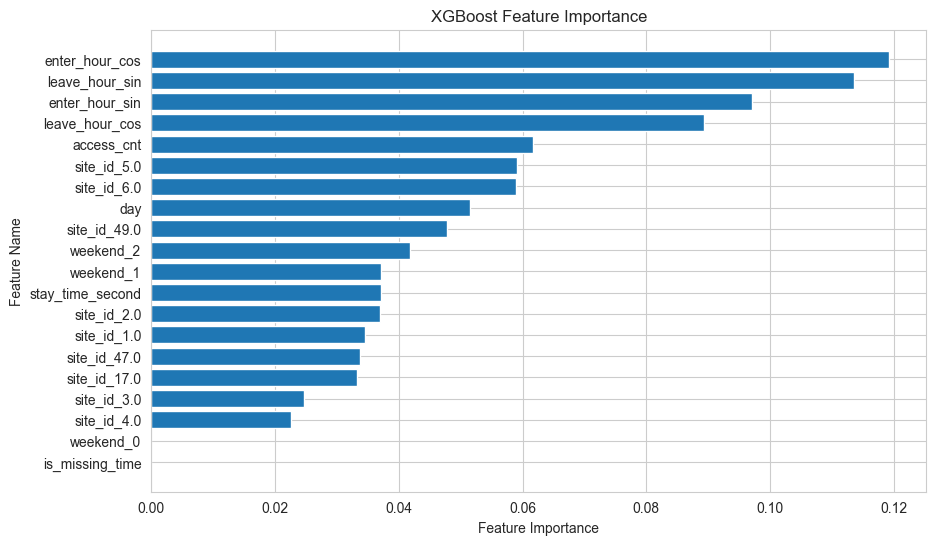

In [25]:
# Feature Importance 추출
feature_importances = model.feature_importances_
feature_names = x.columns

# 데이터프레임 생성 후 정렬
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
plt.show()

최적화를 해보자

In [26]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# SMOTE 적용 (소수 클래스 오버샘플링)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Stratified K-Fold 설정 (5-Fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost 모델 & 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42)

# GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=kf,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_resampled, y_resampled)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측 및 평가
best_model = grid_search.best_estimator_
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
y_pred = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.7388028463792382
              precision    recall  f1-score   support

           0       0.68      0.93      0.78      1216
           1       0.88      0.54      0.67      1173

    accuracy                           0.74      2389
   macro avg       0.78      0.74      0.73      2389
weighted avg       0.78      0.74      0.73      2389



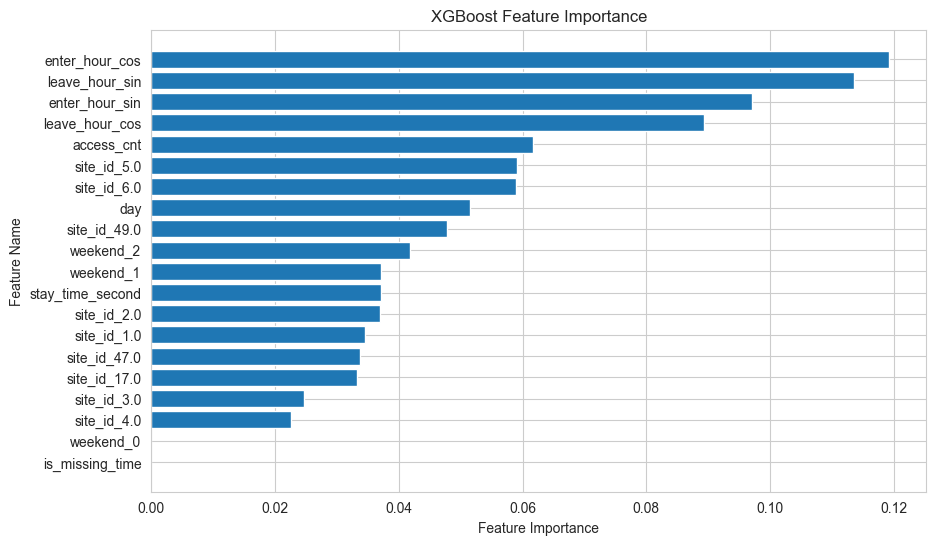

In [27]:
# Feature Importance 추출
feature_importances = model.feature_importances_
feature_names = x.columns

# 데이터프레임 생성 후 정렬
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
plt.show()

In [28]:
# 명진님이 고쳐주신 코드 - test 데이터셋 smote 제외하려고
from imblearn.pipeline import Pipeline

# Stratified K-Fold 설정 (5-Fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost 모델 & 하이퍼파라미터 그리드 설정
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

# Pipeline 생성 (SMOTE + XGBoost)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # 훈련 데이터에만 SMOTE 적용
    ('xgbclassifier', XGBClassifier(random_state=42))
])

# GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=kf,
    verbose=2,
    n_jobs=-1
)

# 데이터 분할 (SMOTE 적용 전, 원본 데이터로 진행)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# GridSearch 실행
grid_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측 및 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__subsample': 1.0}
Accuracy: 0.6161038961038962
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1195
           1       0.49      0.26      0.34       730

    accuracy                           0.62      1925
   macro avg       0.57      0.55      0.54      1925
weighted avg       0.59      0.62      0.58      1925



-----------
#### 면적 정보 추가한 ver.

In [29]:
share_df_3 = pd.read_csv('./data/share_office_data2.csv')
share_df_3 = share_df_3.drop('Unnamed: 0', axis = 1)

In [30]:
# 입퇴실 시간 머지하기
share_df_4 = share_df_3.merge(time_df, on='user_uuid', how='left')

In [31]:
# 필요없는 열 삭제
share_df_4 = share_df_4.drop(['first_enter_time','last_leave_time','enter_hour','leave_hour'], axis = 1)

In [32]:
# '시간 없음'을 모델이 알게 하기
share_df_4['is_missing_time'] = share_df_4['enter_hour_sin'].isna().astype(int)

# 시간 데이터 결측치를 대체
share_df_4['enter_hour_cos'] = share_df_4['enter_hour_cos'].fillna(1)
share_df_4['leave_hour_cos'] = share_df_4['leave_hour_cos'].fillna(1)
share_df_4['enter_hour_sin'] = share_df_4['enter_hour_sin'].fillna(0)
share_df_4['leave_hour_sin'] = share_df_4['leave_hour_sin'].fillna(0)

share_df_4.head()

,is_payment,user_uuid,trial_date,day,access_cnt,stay_time_second,weekend_0,weekend_1,weekend_2,office_area_50.0,office_area_100.0,office_area_150.0,enter_hour_sin,enter_hour_cos,leave_hour_sin,leave_hour_cos,is_missing_time
0,0,2b251333-8676-4c11-a736-dcf2350f8821,2023-12-21,-0.775964,0.195142,-0.376638,0,1,0,1,0,0,0.707107,-0.707107,-0.866025,-0.500000,0
1,0,e111619a-0975-451b-9a4a-bc8aea7b7b84,2023-12-21,0.791066,-0.680311,-0.710421,0,1,0,0,1,0,0.866025,0.500000,-0.707107,-0.707107,0
2,1,4a184795-b056-4572-a874-644f68609ea3,2023-12-21,0.000000,0.000000,0.000000,1,0,0,0,0,0,0.000000,1.000000,0.000000,1.000000,1
3,0,2ba8ab19-2d40-4423-ad04-f0f9ca814871,2023-12-21,-0.775964,-0.789743,-0.957817,0,1,0,1,0,0,-0.707107,0.707107,-0.500000,0.866025,0
4,0,1d49ba36-6c23-405b-9514-aa7f4aeceff0,2023-12-21,-0.775964,-0.570880,-0.947543,0,1,0,1,0,0,-0.707107,0.707107,-0.500000,0.866025,0


In [33]:
# test 데이터셋 smote 제외해서 최적화(명진님 코드 참고)
# 독립변수 종속변수 분리하기 
x = share_df_4.drop(['is_payment','user_uuid','trial_date'], axis = 1)
y = share_df_4['is_payment']

# Stratified K-Fold 설정 (5-Fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost 모델 & 하이퍼파라미터 그리드 설정
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

# Pipeline 생성 (SMOTE + XGBoost)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # 훈련 데이터에만 SMOTE 적용
    ('xgbclassifier', XGBClassifier(random_state=42))
])

# GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=kf,
    verbose=2,
    n_jobs=-1
)

# 데이터 분할 (SMOTE 적용 전, 원본 데이터로 진행)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# GridSearch 실행
grid_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측 및 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 300, 'xgbclassifier__subsample': 1.0}
Accuracy: 0.6342857142857142
              precision    recall  f1-score   support

           0       0.66      0.86      0.74      1195
           1       0.54      0.27      0.36       730

    accuracy                           0.63      1925
   macro avg       0.60      0.56      0.55      1925
weighted avg       0.61      0.63      0.60      1925



------------
### 지점 정보 다시 포함시켜보자 

In [34]:
share_df.columns

Index(['is_payment', 'user_uuid', 'trial_date', 'day', 'access_cnt',
       'stay_time_second', 'site_id_1.0', 'site_id_2.0', 'site_id_3.0',
       'site_id_4.0', 'site_id_5.0', 'site_id_6.0', 'site_id_17.0',
       'site_id_47.0', 'site_id_49.0', 'weekend_0', 'weekend_1', 'weekend_2'],
      dtype='object')

In [35]:
share_site_id = share_df[['user_uuid','site_id_1.0', 'site_id_2.0', 'site_id_3.0',
       'site_id_4.0', 'site_id_5.0', 'site_id_6.0', 'site_id_17.0',
       'site_id_47.0', 'site_id_49.0']]
share_site_id


,user_uuid,site_id_1.0,site_id_2.0,site_id_3.0,site_id_4.0,site_id_5.0,site_id_6.0,site_id_17.0,site_id_47.0,site_id_49.0
0,2b251333-8676-4c11-a736-dcf2350f8821,0,0,0,0,0,0,0,0,1
1,e111619a-0975-451b-9a4a-bc8aea7b7b84,0,1,0,0,0,0,0,0,0
2,4a184795-b056-4572-a874-644f68609ea3,0,0,0,0,0,0,0,0,0
3,2ba8ab19-2d40-4423-ad04-f0f9ca814871,0,0,0,0,0,0,1,0,0
4,1d49ba36-6c23-405b-9514-aa7f4aeceff0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9619,d7599df4-1e5a-4f5e-97ce-c42047bfd87c,0,0,0,0,0,1,0,0,0
9620,43263092-3b28-4817-9fa9-4205ad3097fe,0,0,0,0,0,0,0,0,0
9621,51a40f33-1027-4544-9b95-45bca7c104fb,0,0,0,0,0,1,0,0,0
9622,3e649531-bf5b-4b99-84e5-ca3e0e647d0c,0,0,1,0,0,0,0,0,0


In [36]:
share_df_5 = share_df_4.merge(share_site_id, on='user_uuid', how='left')
share_df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9624 entries, 0 to 9623
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_payment         9624 non-null   int64  
 1   user_uuid          9624 non-null   object 
 2   trial_date         9624 non-null   object 
 3   day                9624 non-null   float64
 4   access_cnt         9624 non-null   float64
 5   stay_time_second   9624 non-null   float64
 6   weekend_0          9624 non-null   int64  
 7   weekend_1          9624 non-null   int64  
 8   weekend_2          9624 non-null   int64  
 9   office_area_50.0   9624 non-null   int64  
 10  office_area_100.0  9624 non-null   int64  
 11  office_area_150.0  9624 non-null   int64  
 12  enter_hour_sin     9624 non-null   float64
 13  enter_hour_cos     9624 non-null   float64
 14  leave_hour_sin     9624 non-null   float64
 15  leave_hour_cos     9624 non-null   float64
 16  is_missing_time    9624 

In [37]:
# test 데이터셋 smote 제외해서 최적화(명진님 코드 참고)
# 독립변수 종속변수 분리하기 
x = share_df_5.drop(['is_payment','user_uuid','trial_date'], axis = 1)
y = share_df_5['is_payment']

# Stratified K-Fold 설정 (5-Fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost 모델 & 하이퍼파라미터 그리드 설정
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

# Pipeline 생성 (SMOTE + XGBoost)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # 훈련 데이터에만 SMOTE 적용
    ('xgbclassifier', XGBClassifier(random_state=42))
])

# GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=kf,
    verbose=2,
    n_jobs=-1
)

# 데이터 분할 (SMOTE 적용 전, 원본 데이터로 진행)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# GridSearch 실행
grid_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측 및 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 300, 'xgbclassifier__subsample': 1.0}
Accuracy: 0.6415584415584416
              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1195
           1       0.56      0.27      0.36       730

    accuracy                           0.64      1925
   macro avg       0.61      0.57      0.56      1925
weighted avg       0.62      0.64      0.60      1925



Accuracy: 0.6416
              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1195
           1       0.56      0.27      0.36       730

    accuracy                           0.64      1925
   macro avg       0.61      0.57      0.56      1925
weighted avg       0.62      0.64      0.60      1925



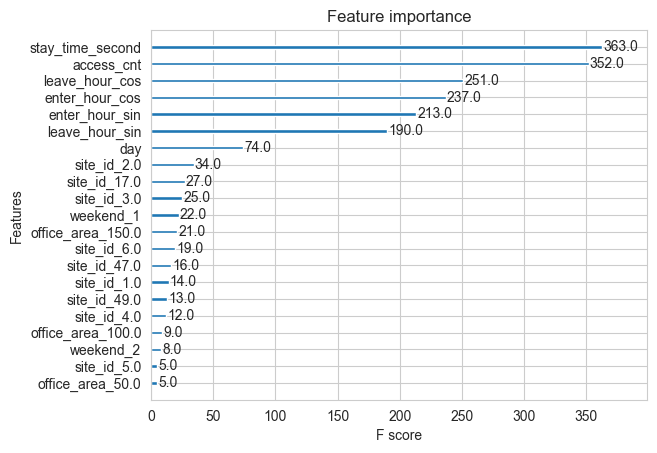

In [38]:
# train-test split (train에는 smote 적용, test에는 원본 그대로 사용)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# 파이프라인 구성 (훈련할 때만 SMOTE 적용)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgbclassifier', XGBClassifier(
        colsample_bytree=1.0,
        learning_rate=0.1,
        max_depth=3,
        n_estimators=300,
        subsample=1.0,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'  # 경고 안뜨게 추가
    ))
])

# 학습 (train에는 smote 적용)
pipeline.fit(x_train, y_train)

# 예측 (test는 원본 데이터로 예측)
y_pred = pipeline.predict(x_test)

# 평가
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

# 특성 중요도 시각화 (XGB 모델 꺼내서 직접 접근해야 함)
from xgboost import plot_importance
xgb_model = pipeline.named_steps['xgbclassifier']
plot_importance(xgb_model)
plt.show()


------------------------
### recall을 올릴 순 없을까?

   Threshold  Accuracy    Recall
0       0.10  0.379221  1.000000
1       0.15  0.379740  0.998630
2       0.20  0.383896  0.991781
3       0.25  0.395325  0.964384
4       0.30  0.416104  0.926027
5       0.35  0.456104  0.849315
6       0.40  0.484675  0.735616
7       0.45  0.515844  0.616438
8       0.50  0.641558  0.269863
9       0.55  0.642597  0.172603


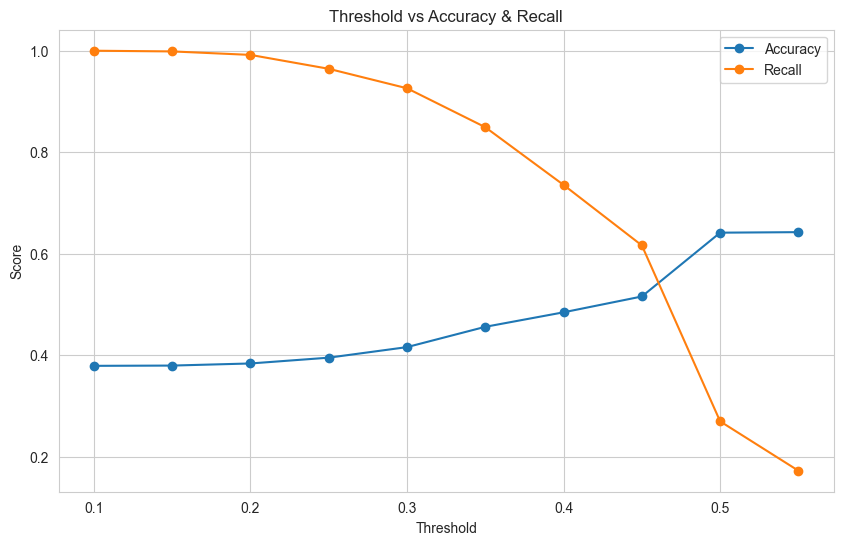


🔎 Recall 기준 최적 Threshold: 0.10

[최적 Threshold 적용 성능]
Accuracy: 0.3792
Recall: 1.0000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1195
           1       0.38      1.00      0.55       730

    accuracy                           0.38      1925
   macro avg       0.19      0.50      0.27      1925
weighted avg       0.14      0.38      0.21      1925



In [39]:
# threshold 조정해서 recall 올리기
from sklearn.metrics import classification_report, accuracy_score, recall_score

# 모델 예측 확률
y_prob = pipeline.predict_proba(x_test)[:, 1]

# 여러 threshold에서 평가해보기
thresholds = np.arange(0.1, 0.6, 0.05)

results = []

for thresh in thresholds:
    y_pred = (y_prob >= thresh).astype(int)
    
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append([thresh, acc, recall])

# 결과 정리
results_df = pd.DataFrame(results, columns=['Threshold', 'Accuracy', 'Recall'])

# 결과 출력
print(results_df)

# 시각화 (추가 옵션)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall', marker='o')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Accuracy & Recall')
plt.legend()
plt.grid(True)
plt.show()

# 최적 threshold 선택 (예: Recall 기준으로 가장 높은 것 찾기)
best_threshold = results_df.loc[results_df['Recall'].idxmax(), 'Threshold']
print(f'\n🔎 Recall 기준 최적 Threshold: {best_threshold:.2f}')

# 최적 threshold로 최종 평가
y_pred_best = (y_prob >= best_threshold).astype(int)
print(f'\n[최적 Threshold 적용 성능]')
print(f'Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_best):.4f}')
print(classification_report(y_test, y_pred_best))

- recall이 올라가면 어쩔 수 없이 정확도는 많이 낮아진다. `기각`

In [40]:
# XGBoost 평가 지표 변경 : logloss > aucpr
# train-test split (훈련 데이터에만 SMOTE 적용)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# 파이프라인 구성 (훈련할 때만 SMOTE 적용)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgbclassifier', XGBClassifier(
        colsample_bytree=1.0,
        learning_rate=0.1,
        max_depth=3,
        n_estimators=300,
        subsample=1.0,
        random_state=42,
        use_label_encoder=False,
        eval_metric='aucpr'  # 여기가 포인트
    ))
])

# 학습
pipeline.fit(x_train, y_train)

# 예측
y_pred = pipeline.predict(x_test)

# 평가
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.6416
Recall: 0.2699
              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1195
           1       0.56      0.27      0.36       730

    accuracy                           0.64      1925
   macro avg       0.61      0.57      0.56      1925
weighted avg       0.62      0.64      0.60      1925



- 평가지표를 logloss > aucpr로 변경해봤지만 결과는 완전 똑같다

가중치 조정

scale_pos_weight: 1.63
Accuracy: 0.6031
Recall: 0.3849
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1195
           1       0.47      0.38      0.42       730

    accuracy                           0.60      1925
   macro avg       0.57      0.56      0.56      1925
weighted avg       0.59      0.60      0.59      1925



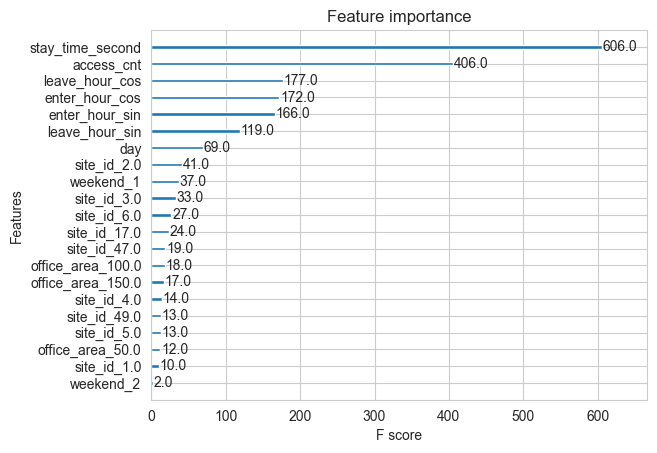

In [41]:
# SMOTE 대신 가중치 조정
from collections import Counter

# 데이터 준비
x = share_df_5.drop(['is_payment', 'user_uuid', 'trial_date'], axis=1)
y = share_df_5['is_payment']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# 클래스 비율 체크 (scale_pos_weight 계산용)
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]  # Negative 수 / Positive 수
print(f'scale_pos_weight: {scale_pos_weight:.2f}')  # 확인용

# XGBoost 설정 (최적 파라미터 + scale_pos_weight 추가)
xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=300,
    subsample=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='aucpr',  # 불균형 대응용 메트릭
    scale_pos_weight=scale_pos_weight  # 핵심 포인트!
)

# 학습
xgb.fit(x_train, y_train)

# 예측
y_pred = xgb.predict(x_test)

# 성능 평가
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

# 특성 중요도 시각화 (옵션)
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb)
plt.show()


> 정확도가 0.04정도 낮아지긴 하지만, recall은 0.38까지 올라간다

----------------
외부데이터 모델에 넣어보기

In [46]:
share_df_5['trial_date']

0       2023-12-21
1       2023-12-21
2       2023-12-21
3       2023-12-21
4       2023-12-21
           ...    
9619    2023-11-17
9620    2023-11-17
9621    2023-11-17
9622    2023-11-18
9623    2023-11-18
Name: trial_date, Length: 9624, dtype: object

In [50]:
office_df = pd.read_csv('./data/오피스텔월세정보.csv')
office_df

,날짜,평균월세보증금,평균월세가격,중위월세가격
0,2021-05,8129.0,520.0,509.0
1,2021-06,8101.0,520.0,509.0
2,2021-07,8054.0,521.0,509.0
3,2021-08,7981.0,522.0,510.0
4,2021-09,8040.0,522.0,510.0
5,2021-10,8037.0,523.0,510.0
6,2021-11,7980.0,524.0,512.0
7,2021-12,7962.0,525.0,513.0
8,2022-01,7957.0,525.0,513.0
9,2022-02,7957.0,526.0,514.0


In [ ]:
# 년-월 정보 추출
share_df_5['year_month'] = share_df_5['trial_date'].str[:7]

# 머지
share_df_6 = share_df_5.merge(office_df, left_on='year_month', right_on='날짜', how='inner')

# 정리 (필요에 따라)
share_df_6 = share_df_6.drop(columns=['year_month','날짜'])  # '날짜'는 남겨두기

share_df_6

,is_payment,user_uuid,trial_date,day,access_cnt,stay_time_second,weekend_0,weekend_1,weekend_2,office_area_50.0,office_area_100.0,office_area_150.0,enter_hour_sin,enter_hour_cos,leave_hour_sin,leave_hour_cos,is_missing_time,site_id_1.0,site_id_2.0,site_id_3.0,site_id_4.0,site_id_5.0,site_id_6.0,site_id_17.0,site_id_47.0,site_id_49.0,평균월세보증금,평균월세가격,중위월세가격
0,0,2b251333-8676-4c11-a736-dcf2350f8821,2023-12-21,-0.775964,0.195142,-0.376638,0,1,0,1,0,0,0.707107,-0.707107,-0.866025,-0.500000,0,0,0,0,0,0,0,0,0,1,8111.0,539.0,525.0
1,0,e111619a-0975-451b-9a4a-bc8aea7b7b84,2023-12-21,0.791066,-0.680311,-0.710421,0,1,0,0,1,0,0.866025,0.500000,-0.707107,-0.707107,0,0,1,0,0,0,0,0,0,0,8111.0,539.0,525.0
2,1,4a184795-b056-4572-a874-644f68609ea3,2023-12-21,0.000000,0.000000,0.000000,1,0,0,0,0,0,0.000000,1.000000,0.000000,1.000000,1,0,0,0,0,0,0,0,0,0,8111.0,539.0,525.0
3,0,2ba8ab19-2d40-4423-ad04-f0f9ca814871,2023-12-21,-0.775964,-0.789743,-0.957817,0,1,0,1,0,0,-0.707107,0.707107,-0.500000,0.866025,0,0,0,0,0,0,0,1,0,0,8111.0,539.0,525.0
4,0,1d49ba36-6c23-405b-9514-aa7f4aeceff0,2023-12-21,-0.775964,-0.570880,-0.947543,0,1,0,1,0,0,-0.707107,0.707107,-0.500000,0.866025,0,0,0,0,0,0,0,1,0,0,8111.0,539.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,0,d7599df4-1e5a-4f5e-97ce-c42047bfd87c,2023-11-17,0.791066,2.383776,1.617236,0,0,1,0,0,1,0.500000,-0.866025,-0.965926,0.258819,0,0,0,0,0,0,1,0,0,0,8075.0,539.0,526.0
9620,0,43263092-3b28-4817-9fa9-4205ad3097fe,2023-11-17,0.000000,0.000000,0.000000,1,0,0,0,0,0,0.000000,1.000000,0.000000,1.000000,1,0,0,0,0,0,0,0,0,0,8075.0,539.0,526.0
9621,0,51a40f33-1027-4544-9b95-45bca7c104fb,2023-11-17,0.791066,0.304574,2.304369,0,0,1,0,0,1,0.258819,-0.965926,-0.965926,0.258819,0,0,0,0,0,0,1,0,0,0,8075.0,539.0,526.0
9622,0,3e649531-bf5b-4b99-84e5-ca3e0e647d0c,2023-11-18,-0.775964,-0.461448,-0.081284,0,0,1,0,0,1,-0.258819,-0.965926,-0.707107,0.707107,0,0,0,1,0,0,0,0,0,0,8075.0,539.0,526.0


In [ ]:
# 독립변수 종속변수 분리하기 
x = share_df_6.drop(['is_payment','user_uuid','trial_date'], axis = 1)
y = share_df_6['is_payment']

# Stratified K-Fold 설정 (5-Fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost 모델 & 하이퍼파라미터 그리드 설정
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

# Pipeline 생성 (SMOTE + XGBoost)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # 훈련 데이터에만 SMOTE 적용
    ('xgbclassifier', XGBClassifier(random_state=42))
])

# GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=kf,
    verbose=2,
    n_jobs=-1
)

# 데이터 분할 (SMOTE 적용 전, 원본 데이터로 진행)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# GridSearch 실행
grid_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측 및 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 300, 'xgbclassifier__subsample': 1.0}
Accuracy: 0.6150649350649351
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1195
           1       0.49      0.38      0.43       730

    accuracy                           0.62      1925
   macro avg       0.58      0.57      0.57      1925
weighted avg       0.60      0.62      0.60      1925



- 성능은 약간 내려갔지만, recall은 올라갔다.    

In [56]:
share_office_data3 = pd.read_csv('./data/share_office_data3.csv')
share_office_data3 = share_office_data3.drop('Unnamed: 0', axis = 1)
share_office_data3.head(1)

,is_payment,user_uuid,trial_date,day,access_cnt,stay_time_second,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,weekend_0,weekend_1,weekend_2,office_area_50.0,office_area_100.0,office_area_150.0,site_id_1.0,site_id_2.0,site_id_3.0,site_id_4.0,site_id_5.0,site_id_6.0,site_id_17.0,site_id_47.0,site_id_49.0
0,0,2b251333-8676-4c11-a736-dcf2350f8821,2023-12-21,-0.775964,0.195142,-0.376638,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
